In [9]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn import pipeline, grid_search

from sklearn.preprocessing import StandardScaler

from sklearn.lda import LDA
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier # Gini and Entropy
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [2]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv').values
id_test = pd.read_csv('id_test.csv').values
x_test = pd.read_csv('x_test.csv')

In [4]:
# label encoder for RF
le_dow = LabelEncoder()
x_train['DayOfWeek'] = le_dow.fit_transform(x_train['DayOfWeek'])
le_pd = LabelEncoder()
x_train['PdDistrict'] = le_pd.fit_transform(x_train['PdDistrict'])
le_category = LabelEncoder()
y_train = le_category.fit_transform(y_train)
#test
x_test['DayOfWeek'] = le_dow.transform(x_test['DayOfWeek'])
x_test['PdDistrict'] = le_pd.transform(x_test['PdDistrict'])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:127: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
print("\nTraining Random Forest ....")
rfc = RandomForestClassifier(n_estimators = 20, n_jobs=-1, random_state=20, criterion='gini', class_weight='auto')
param_grid = {'min_samples_leaf': [5,10]}
rffc_gs = grid_search.GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 4, n_jobs=-1, error_score=0, verbose=2) # 
rffc_gs_fit = rffc_gs.fit(x_train, y_train)
print("Best parameters found by grid search:", rffc_gs.best_params_)
print("Best CV score:", rffc_gs.best_score_)


Training Random Forest ....
Fitting 4 folds for each of 2 candidates, totalling 8 fits

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\sit


Best parameters found by grid search: {'min_samples_leaf': 5}
Best CV score: 0.0495803764938


C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\sit

In [5]:
#Best parameters found by grid search: {n_estimators = 20,'min_samples_leaf': 5}
#Best CV3 score: 0.0495803764938
rfc = RandomForestClassifier(n_estimators = 20, n_jobs=-1, random_state=20, criterion='gini', class_weight='auto',min_samples_leaf=5)
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)
features_lb = sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), x_train.columns), reverse=True, key=lambda pair: pair[0])
features_lb

C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Anaconda3\lib\sit

[(0.1648, 'X'),
 (0.16239999999999999, 'Y'),
 (0.095500000000000002, 'hour'),
 (0.095200000000000007, 'day'),
 (0.083400000000000002, 'avg_temp'),
 (0.080000000000000002, 'avg_moist'),
 (0.073499999999999996, 'avg_wind'),
 (0.065600000000000006, 'year'),
 (0.061800000000000001, 'month'),
 (0.056800000000000003, 'DayOfWeek'),
 (0.029499999999999998, 'PdDistrict'),
 (0.0258, 'avg_prec'),
 (0.0057000000000000002, 'day_night')]

In [13]:
probs = rfc.predict_proba(x_test)
predictions  = rfc.predict(x_test)

In [11]:
predictions  = rfc.predict(x_test)

array([36, 21, 16, ..., 12, 12, 13], dtype=int64)

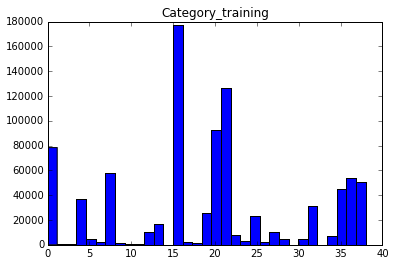

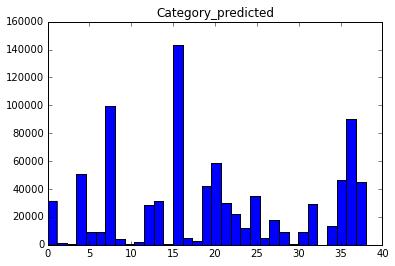

In [17]:
h1 = plt.hist(y_train, bins= 33)
plt.title('Category_training')
plt.show()
plt.hist(predictions, bins=33)
plt.title('Category_predicted')
plt.show()

In [7]:
probs

array([[ 0.        ,  0.10485376,  0.        , ...,  0.14289809,
         0.08148815,  0.01457992],
       [ 0.        ,  0.09467441,  0.        , ...,  0.0465997 ,
         0.07936186,  0.07218788],
       [ 0.        ,  0.05815786,  0.        , ...,  0.04599915,
         0.01687331,  0.14272232],
       ..., 
       [ 0.        ,  0.0715025 ,  0.08533007, ...,  0.09056785,
         0.00839223,  0.03416453],
       [ 0.03713226,  0.02295921,  0.03835615, ...,  0.03740082,
         0.06935637,  0.01151006],
       [ 0.        ,  0.04261491,  0.03835615, ...,  0.03503436,
         0.01025056,  0.04364401]])

** work in progress **

In [ ]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
le_category = LabelEncoder()
y_train = le_category.fit_transform(y_train)
lrc = LogisticRegression(random_state=20,class_weight='auto',multi_class='ovr')
param_grid = {'C' : [1,0.5]}
model = grid_search.GridSearchCV(estimator = lrc, param_grid = param_grid, n_jobs = -1, cv = 4, verbose = 20)
model_fit = model.fit(x_train, y_train)
pipe_lrd = pipeline.Pipeline([('lda', LDA(n_components = 50)),('clf', lrc])
param_grid = {'rfr__min_samples_leaf' : [250,500],'rfr__subsample':[0.7],"rfr__learning_rate":[0.01,0.001]}
model = grid_search.GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs = -1, cv = 4, verbose = 20)
model_fit = model.fit(xtrain, ytrain)
pipe_lrd.fit(x_train_cv, y_train_cv)
#prob_lr_lda = pipe_lrd.predict_proba(x_test_cv)[:,1]
lg_lda_scores.append(roc_auc_score(y_test_cv,prob_lr_lda))

In [ ]:
print("\nTraining Gradient Boosting ....")
gbc = GradientBoostingClassifier(random_state=3, n_estimators = 50, max_features ='auto', subsample=0.8, learning_rate=0.1)
param_grid = {'min_samples_leaf': [50,200]}
gbc_gs = grid_search.GridSearchCV(estimator = gbc, param_grid = param_grid, cv = 3, n_jobs=-1, error_score=0, verbose=2) # 
gbc_gs_fit = gbc_gs.fit(x_train, y_train)
print("Best parameters found by grid search:", gbc_gs.best_params_)
print("Best CV score:", gbc_gs.best_score_)

In [ ]:
print("\nTraining AdaBoostClassifier ....")
abc = AdaBoostClassifier(n_estimators=2000, random_state=3,learning_rate=0.3)
param_grid = {'learning_rate': [0.3,0.8]}
abc_gs = grid_search.GridSearchCV(estimator = abc, param_grid = param_grid, cv = 3, n_jobs=-1, error_score=0, verbose=2) # 
abc_gs_fit = abc_gs.fit(x_train, y_train)
print("Best parameters found by grid search:", abc_gs.best_params_)
print("Best CV score:", abc_gs.best_score_)